In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
pip install plotly==5.0.0

In [ ]:
import plotly.express as px


In [ ]:
crime=pd.read_csv('/content/Philadelphia_Crime_Rate_noNA.csv')

In [ ]:
crime

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


In [ ]:
dataFrame = pd.DataFrame(data=crime, columns=['HousePrice','CrimeRate']);


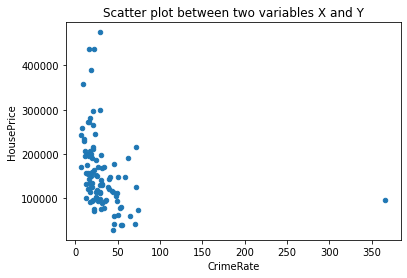

In [ ]:
dataFrame.plot.scatter(x='CrimeRate', y='HousePrice', title= "Scatter plot between two variables X and Y");

plt.show(block=True);

In [ ]:
x=crime[['CrimeRate']]
y=crime[['HousePrice']]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict([[350]])

array([[11551.26936181]])

In [ ]:
model.score(x_train,y_train)

0.05109693148915717

In [ ]:
model.score(x_test,y_test)

0.0780184443365467

In [ ]:
crime.CrimeRate

0     29.7
1     24.1
2     19.5
3     49.4
4     54.1
      ... 
94    13.8
95    29.9
96     9.9
97    22.6
98    13.0
Name: CrimeRate, Length: 99, dtype: float64

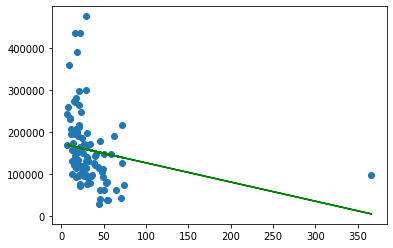

In [ ]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color='green')

In [ ]:
t=crime[(crime['County']=='Montgome') & (crime['Name']=='Ambler')]
t.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome


In [ ]:
model.predict([t.CrimeRate])

array([[160486.44831224]])

In [ ]:
crime['prediction_price']=model.predict(x)
crime

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County,prediction_price
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome,157927.267575
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome,160486.448312
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware,162588.632489
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks,148924.435341
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks,146776.551508
...,...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester,165193.512882
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome,157835.868263
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester,166975.799466
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome,161171.943152


In [ ]:
px.scatter(crime,x='CrimeRate',y='HousePrice')




In [ ]:
Phila=crime[crime['CrimeRate']==366.1]
Phila

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County,prediction_price
62,96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila,4193.624744


In [ ]:

px.line(crime,x='CrimeRate',y='prediction_price')


## Remove the unusual dataset

In [ ]:
remove_Phila=crime[crime['CrimeRate']!=366.1]


In [ ]:
remove_Phila

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County,prediction_price
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome,157927.267575
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome,160486.448312
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware,162588.632489
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks,148924.435341
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks,146776.551508
...,...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester,165193.512882
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome,157835.868263
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester,166975.799466
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome,161171.943152


In [ ]:
px.scatter(remove_Phila,x='CrimeRate',y='HousePrice')

## new model after removing the ususual data

In [ ]:
p=remove_Phila[['CrimeRate']]
q=remove_Phila[['HousePrice']]

In [ ]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.2)

In [ ]:
new_model=LinearRegression()

In [ ]:
new_model.fit(p,q)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

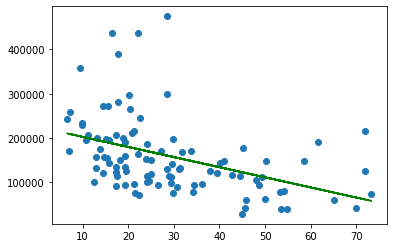

In [ ]:
plt.scatter(p,q)
plt.plot(p,new_model.predict(p),color='green')

## comparing the coefficients

In [ ]:
print(model.coef_)

[[-456.99656014]]


In [ ]:
print(new_model.coef_)

[[-2288.68942995]]


## removing the high value towns

In [ ]:
crime_highend=crime[crime['HousePrice'] < 350000]
crime_highend


,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County,prediction_price
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome,157927.267575
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome,160486.448312
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware,162588.632489
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks,148924.435341
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks,146776.551508
...,...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester,165193.512882
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome,157835.868263
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester,166975.799466
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome,161171.943152


In [ ]:
crime_highend_model=LinearRegression()


In [ ]:
crime_highend_model.fit(crime_highend[['CrimeRate']],crime_highend[['HousePrice']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(new_model.coef_)
print(crime_highend_model.coef_)

[[-2288.68942995]]
[[-452.68925858]]
